In [1]:
%matplotlib inline
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
def get_SNR(file):
    with open(file, "rt")as f:
        a = f.readlines()
    lst = []
    for x in a:
        if "Value:" in x:
            lst.append(float(x.split("Value: ")[1]))
        #print(x.split("bla"))
    lst = lst[len(lst)//2 : ]
    return (np.array(lst).mean(), np.array(lst).std())

In [3]:
def get_BER(file):
    with open(file, "rb")as f:
        _ = f.read()
    
    rcv = np.frombuffer(_, dtype = np.uint8)
    aux = np.unpackbits(rcv)
    
    tx = np.array([0, 255, 40, 250, 37, 42, 186], dtype = np.uint8)
    
    pos = np.argmax(np.correlate(np.unpackbits(rcv), np.unpackbits(tx)))
    rcv = np.packbits(np.roll(np.unpackbits(rcv), -pos))
    tx_extended = np.tile(tx, int(rcv.shape[0]/len(tx)))
    
    return (1 - np.mean(np.equal(np.unpackbits(rcv), np.unpackbits(tx_extended))))

In [4]:
get_SNR("output.txt"), get_BER("output.data")

((0.9599895756097561, 0.7407993636859767), 0.37847946428571433)

# <font color = green> Prática
## <font color = green> Resultados Práticos LADAMS 30-05-2019

((8.77181475609756, 0.3008606065136641), 0.00011125000000000718)
    
((9.453242804878048, 0.2658462860709971), 5.750000000004363e-05)
    
((9.185610609756099, 0.41476179242074274), 6.71428571428212e-05)
 
((8.866623902439025, 0.294986507995544), 0.00012339285714291215)
    
((9.622166951219514, 1.0398465335264846), 9.821428571432644e-05)
    
((7.299375609756098, 0.4045579303963518), 0.0012450000000000516)
    
((8.326575731707317, 0.3724866355960107), 0.00021571428571431905)

((8.312029146341462, 0.3077140684902663), 0.00032517857142855267)
    
((7.940162195121952, 0.3362863245807945), 0.000555892857142859)
    
((7.677484634146342, 0.4720197150109438), 0.0008541071428571634)
    
((7.196679512195122, 0.36906409942930907), 0.0016087500000000476)
    
((6.656667560975608, 0.7205276147880108), 0.00736196428571434)
    
((6.148087317073171, 0.46101472650952874), 0.004378035714285744)
    
((6.152908048780488, 0.4564571152149335), 0.005261785714285705)
    
((5.738601097560975, 0.3539560330833654), 0.006016428571428589)
    
((5.664774146341463, 0.46128925697427753), 0.007335714285714334)
    
((5.975970975609757, 0.3962771078751301), 0.006683392857142811)
    
((5.609125853658536, 0.40069386390741213), 0.009343749999999984)
    
((4.871975853658536, 0.36648653154619343), 0.015108035714285761)
    
((4.757507073170731, 0.44422195188915886), 0.016901964285714333)
    
((4.73768756097561, 0.42975463548220333), 0.01720624999999998)
    
((4.358575853658537, 0.4557306226589884), 0.025262857142857142)

((4.088783414634146, 0.4393728217091186), 0.029167142857142836)
    
((3.2637823170731703, 0.48080871682395643), 0.04642928571428573)

((3.008432317073171, 0.5724265929278379), 0.05466955357142855)
    
((2.7222030487804876, 0.592429401743753), 0.06464499999999995)
    
((2.2896656707317073, 0.5400288501046654), 0.08012241071428572)

((2.200523975609756, 0.576617786304208), 0.09242982142857148)
    
((2.136821512195122, 0.5707870921366698), 0.09523526785714287)
    
((1.7423239512195121, 0.5266635261929552), 0.11058017857142854)
    
((1.3681217646341464, 0.652248873057914), 0.12351500000000004)
    
((0.9599895756097561, 0.7407993636859767), 0.37847946428571433)

## <font color = red> Quanto mais baixo o SNR, maior a chance de ocorrer problemas na recepção (de sincronismo)
    
# <font color = blue> Resultados obtidos simulados
  <font color = blue> SNR Média, SNR STD, BER

Apagar valores simulados abaixo:   
((8.826337619047617, 0.21273435929088308), 9.071428571427731e-05)

((6.8066040476190475, 0.28506995506583255), 0.0017678571428570988)
      
((5.646766904761905, 0.3240655694931131), 0.006025714285714301)
      
((4.895880238095238, 0.3273309594532878), 0.01183071428571425)

((4.073850238095237, 0.3813042886717472), 0.02215964285714289)

((3.3837152380952387, 0.4476759898378785), 0.03355857142857144)
    
((2.7745838095238096, 0.39313112472601897), 0.05014678571428577)
      
((2.122036190476191, 0.4174985024949042), 0.06802267857142852)
      
((1.9535068571428573, 0.5848953002822517), 0.06948750000000004)
     
((0.910838619047619, 0.47787939621922904), 0.3007546428571428)
      
((9.45187457142857, 0.2101319170336693), 1.7142857142826706e-05)

((8.207789999999997, 0.21913430407596426), 0.00022732142857140314)
      
((7.191252714285715, 0.2537358722480718), 0.0011891071428571376)
      
((7.516995428571428, 0.25338429086319647), 0.0007219642857142494)

In [5]:
a = """
((8.77181475609756, 0.3008606065136641), 0.00011125000000000718)

((9.453242804878048, 0.2658462860709971), 5.750000000004363e-05)

((9.185610609756099, 0.41476179242074274), 6.71428571428212e-05)

((8.866623902439025, 0.294986507995544), 0.00012339285714291215)

((9.622166951219514, 1.0398465335264846), 9.821428571432644e-05)

((7.299375609756098, 0.4045579303963518), 0.0012450000000000516)

((8.326575731707317, 0.3724866355960107), 0.00021571428571431905)

((8.312029146341462, 0.3077140684902663), 0.00032517857142855267)

((7.940162195121952, 0.3362863245807945), 0.000555892857142859)

((7.677484634146342, 0.4720197150109438), 0.0008541071428571634)

((7.196679512195122, 0.36906409942930907), 0.0016087500000000476)

((6.656667560975608, 0.7205276147880108), 0.00736196428571434)

((6.148087317073171, 0.46101472650952874), 0.004378035714285744)

((6.152908048780488, 0.4564571152149335), 0.005261785714285705)

((5.738601097560975, 0.3539560330833654), 0.006016428571428589)

((5.664774146341463, 0.46128925697427753), 0.007335714285714334)

((5.975970975609757, 0.3962771078751301), 0.006683392857142811)

((5.609125853658536, 0.40069386390741213), 0.009343749999999984)

((4.871975853658536, 0.36648653154619343), 0.015108035714285761)

((4.757507073170731, 0.44422195188915886), 0.016901964285714333)

((4.73768756097561, 0.42975463548220333), 0.01720624999999998)

((4.358575853658537, 0.4557306226589884), 0.025262857142857142)

((4.088783414634146, 0.4393728217091186), 0.029167142857142836)

((3.2637823170731703, 0.48080871682395643), 0.04642928571428573)

((3.008432317073171, 0.5724265929278379), 0.05466955357142855)

((2.7222030487804876, 0.592429401743753), 0.06464499999999995)

((2.2896656707317073, 0.5400288501046654), 0.08012241071428572)

((2.200523975609756, 0.576617786304208), 0.09242982142857148)

((2.136821512195122, 0.5707870921366698), 0.09523526785714287)

((1.7423239512195121, 0.5266635261929552), 0.11058017857142854)

((1.3681217646341464, 0.652248873057914), 0.12351500000000004)

((0.9599895756097561, 0.7407993636859767), 0.37847946428571433)
"""

In [6]:
snr_avgs = []
snr_stds = []
bers = []

for line in a.splitlines():
    aux = line.replace("(", "").replace(")", "").split(",")
    if aux != [""]:
        snr_avgs.append(float(aux[0]))
        snr_stds.append(float(aux[1]))
        bers.append(float(aux[2]))

In [7]:
def print_lst_with_slash(lst):
    print("[ \\")
    for x in lst:
        print(f"{x}, \\")
    print("]")

In [8]:
EbN0_min = 0
EbN0_max = 10
EbN0_range = range(EbN0_min, EbN0_max+1)

In [9]:
simu = np.load("ber_simu.npy")

In [10]:
theory = np.load("ber_theory.npy")

In [11]:
print(plt.style.available)

['seaborn-dark-palette', 'classic', 'seaborn-darkgrid', 'dark_background', 'seaborn', 'fast', 'seaborn-muted', 'seaborn-notebook', 'tableau-colorblind10', 'seaborn-colorblind', 'seaborn-white', 'seaborn-poster', 'grayscale', 'ggplot', 'seaborn-bright', 'Solarize_Light2', 'seaborn-whitegrid', 'seaborn-talk', '_classic_test', 'fivethirtyeight', 'seaborn-dark', 'seaborn-pastel', 'seaborn-paper', 'bmh', 'seaborn-ticks', 'seaborn-deep']


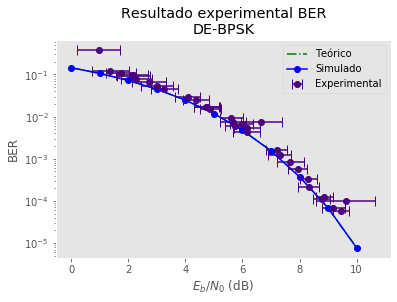

In [13]:
plt.style.use('ggplot')
plt.semilogy(EbN0_range, theory, "g-.", label = "Teórico")
plt.semilogy(EbN0_range, simu, "b-o", label = "Simulado")
# plt.plot(snr_avgs, bers, "r.", label = "Prático LADAMS 30-05-2019")

plt.errorbar(snr_avgs, bers, xerr = snr_stds, fmt = "o", color = "indigo", capsize = 5, label = "Experimental")

plt.legend()
plt.grid()

plt.title(r'Resultado experimental BER'
          "\n"
          r'DE-BPSK')
plt.xlabel(r'$E_b/N_0$ (dB)')
plt.ylabel('BER')
plt.savefig("de-bpsk.png", dpi = 300)